/tmp/ipykernel_87742/163314244.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(f"./results/synthetic/{func}_{optimizer}_{update_rule}_d10000_ni2000

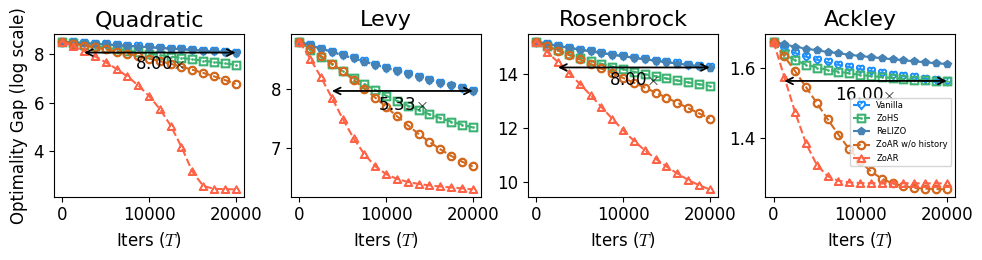

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["figure.figsize"] = (3.5, 3)

n = 16
num_runs = 5

update_rule = "adam"
x_shift = [1.0, 1.0, 1.0, 1.0]
y_shift = [1.01, 1.01, 1.01, 1.01]
# update_rule = "adam"
# x_shift = [1.0, 1.7, 1.5, 1.0]
# y_shift = [1.1, 1.01, 1.02, 1.01]
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR"]
markers = [r'$\heartsuit$', r'$\boxdot$', r'p', r'$\circ$', r'$\triangle$', 'x']
colors = ['#1E90FF', '#3CB371', '#4682B4', '#D2691E', '#FF6347']

plt.figure(figsize=(10, 3))
for i, func in enumerate(funcs):
    plt.subplot(1, len(funcs), 1 + i)
    for j, optimizer in enumerate(optimizers):
        histories = []
        for run in range(num_runs):
            history = torch.load(f"./results/synthetic/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr0.001_nq10_mu0.05_nh5_s{456 + run}.pt")
            histories.append(history)
        
        start = 0
        end = len(histories[0])
        interval = (end - start) // n
        xs = torch.arange(start, end, interval)
        ys = torch.log(torch.tensor(histories).mean(dim=0))[start:end:interval]
        plt.plot(xs, ys, marker=markers[j], color=colors[j], label=labels[j], linestyle='--', markersize=6.0)

        if optimizer == "vanilla":
            x_end = xs[-1]
            y_start, y_end = ys[-1], ys[-1]
        elif optimizer == "zoar":
            dist = torch.abs(ys - y_end)
            ind = torch.argmin(dist)
            x_start = xs[ind]
            speedup = x_end / x_start


    plt.xlabel('Iters ($T$)', fontsize=12)
    # plt.xticks([0, 5000, 10000], fontsize=10)
    plt.title(func.capitalize(), fontsize=16)
    if i == 0:
        plt.ylabel("Optimality Gap (log scale)", fontsize=12)
    if i == len(funcs) - 1:
        plt.legend(fontsize=6, loc='right', bbox_to_anchor=(1.0, 0.4))

    plt.annotate(
        '', # No text
        xy=(x_end, y_end),  # End point of the arrow
        xytext=(x_start, y_start), # Start point of the arrow
        arrowprops=dict(
            arrowstyle="<->", # Double-headed arrow style
            color="black",  # Arrow color
            lw=1.3, # Line width of the arrow
            shrinkA=0, # how much the arrow is shrunk on the start end
            shrinkB=0, # how much the arrow is shrunk on the end end
        ),
    )
    plt.annotate(
        r'%.2f$\times$' % speedup, # No text
        xy=( (x_start + x_end)/2, (y_start + y_end)/2), # Arrow midpoint
        xytext=( (x_start + x_end)/2/x_shift[i], (y_start + y_end)/2/y_shift[i]), # Shift text downwards
        horizontalalignment='center', # Center the text horizontally
        verticalalignment='top'  # Align the text below the arrow
    )
    
    # plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=-0.5)
# plt.savefig(f"./figures/synthetic-{update_rule}.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


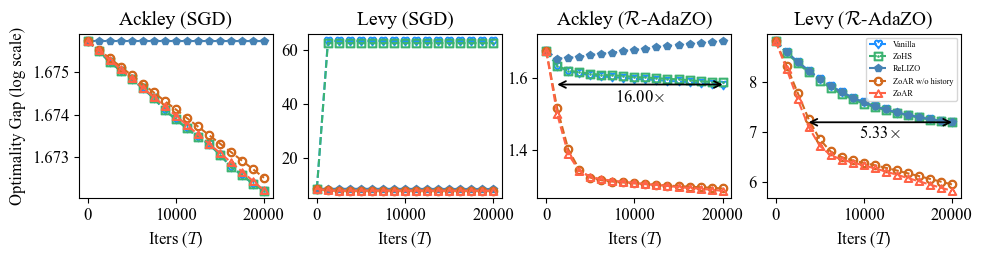

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["figure.figsize"] = (3.5, 3)

n = 16
num_runs = 5

update_rules = ["sgd", "radazo"]
update_rules_labels = ["SGD", r"$\mathcal{R}$-AdaZO"]
muList = [0.5, 0.05]
x_shift = [1.0, 1.0, 1.0, 1.0]
y_shift = [1.01, 1.01, 1.01, 1.01]
y_max = [10.0, 9.5, None, None]
y_min = [6.0, 7.8, None, None]
y_max = [None, None, None, None]
y_min = [None, None, None, None]
funcs = ["ackley", "levy"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR"]
markers = [r'$\heartsuit$', r'$\boxdot$', r'p', r'$\circ$', r'$\triangle$', 'x']
colors = ['#1E90FF', '#3CB371', '#4682B4', '#D2691E', '#FF6347']

plt.figure(figsize=(10, 3))
for i, update_rule in enumerate(update_rules):
    for j, func in enumerate(funcs):
        plt.subplot(1, len(update_rules) * len(funcs), 1 + i * len(funcs) + j)
        for k, optimizer in enumerate(optimizers):
            histories = []
            for run in range(num_runs):
                history = torch.load(f"./results/synthetic/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr0.001_nq10_mu{muList[i]}_nh5_s{456 + run}.pt")
                histories.append(history)
            
            start = 0
            end = len(histories[0])
            interval = (end - start) // n
            xs = torch.arange(start, end, interval)
            ys = torch.log(torch.tensor(histories).mean(dim=0))[start:end:interval]
            plt.plot(xs, ys, marker=markers[k], color=colors[k], label=labels[k], linestyle='--', markersize=6.0)

            if optimizer == "vanilla":
                x_end = xs[-1]
                y_start, y_end = ys[-1], ys[-1]
            elif optimizer == "zoar":
                dist = torch.abs(ys - y_end)
                ind = torch.argmin(dist)
                x_start = xs[ind]
                speedup = x_end / x_start


        plt.xlabel('Iters ($T$)', fontsize=12)
        # plt.xticks([0, 5000, 10000], fontsize=10)
        plt.title(func.capitalize()+f" ({update_rules_labels[i]})", fontsize=14)
        plt.ylim(y_min[i * len(funcs) + j], y_max[i * len(funcs) + j])
        if i == 0 and j == 0:
            plt.ylabel("Optimality Gap (log scale)", fontsize=12)
        if i == len(update_rules) - 1 and j == len(funcs) - 1:
            plt.legend(fontsize=6, loc='upper right')

        if i == 1:
            plt.annotate(
                '', # No text
                xy=(x_end, y_end),  # End point of the arrow
                xytext=(x_start, y_start), # Start point of the arrow
                arrowprops=dict(
                    arrowstyle="<->", # Double-headed arrow style
                    color="black",  # Arrow color
                    lw=1.3, # Line width of the arrow
                    shrinkA=0, # how much the arrow is shrunk on the start end
                    shrinkB=0, # how much the arrow is shrunk on the end end
                ),
            )
            plt.annotate(
                r'%.2f$\times$' % speedup, # No text
                xy=( (x_start + x_end)/2, (y_start + y_end)/2), # Arrow midpoint
                xytext=( (x_start + x_end)/2/x_shift[i], (y_start + y_end)/2/y_shift[i]), # Shift text downwards
                horizontalalignment='center', # Center the text horizontally
                verticalalignment='top'  # Align the text below the arrow
            )
            
            # plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=-0.5)
plt.savefig(f"./figures/synthetic-{"-".join(update_rules)}.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

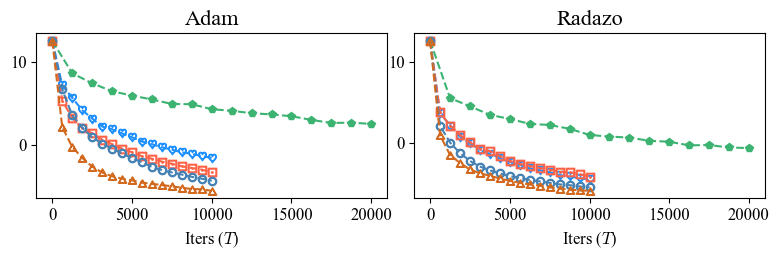

adam_vanilla: 6536.40 ± 1269.24, 1.00x
adam_zohs: 3695.40 ± 584.16, 1.77x
adam_zoar_0: 3258.80 ± 795.32, 2.01x
adam_zoar: 1103.60 ± 283.07, 5.92x
radazo_vanilla: 2327.40 ± 535.00, 1.00x
radazo_zohs: 2329.00 ± 261.06, 1.00x
radazo_relizo: 14114.40 ± 3193.43, 0.16x
radazo_zoar_0: 1244.60 ± 98.31, 1.87x
radazo_zoar: 856.00 ± 216.58, 2.72x


In [2]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["figure.figsize"] = (3.5, 3)

n = 16
num_runs = 5

update_rules = ["adam", "radazo"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR"]
markers = [r'$\heartsuit$', r'$\boxdot$', r'p', r'$\circ$', r'$\triangle$', 'x']
colors = ['#1E90FF', '#FF6347', '#3CB371', '#4682B4', '#D2691E']

plt.figure(figsize=(8, 3))
first_less_zero_dict = {}
for i, update_rule in enumerate(update_rules):
    plt.subplot(1, len(update_rules), 1 + i)
    for i, optimizer in enumerate(optimizers):
        histories = []
        first_less_zero = []
        if not optimizer == "relizo":
            ni = 10000
        else:
            ni = 20000
        for run in range(num_runs):
            history = torch.load(f"./results/attack/mnist_{optimizer}_{update_rule}_ni{ni}_lr0.01_nq2_mu0.5_nh5_s{456 + run}.pt")
            histories.append(history)

            # the first iteration that the optimality gap is less than 0
            history = torch.tensor(history)
            indx = torch.where(history < 0)
            if len(indx[0]) > 0:
                first_less_zero.append(indx[0][0].item())   

        if len(first_less_zero) > 0:
            mean, std = torch.tensor(first_less_zero, dtype=torch.float).mean().item(), torch.tensor(first_less_zero, dtype=torch.float).std().item()
            first_less_zero_dict[f"{update_rule}_{optimizer}"] = (mean, std)

        start = 0
        end = len(histories[0])
        interval = (end - start) // n
        xs = torch.arange(start, end, interval)
        ys = torch.tensor(histories).mean(dim=0)[start:end:interval]
        plt.plot(xs, ys, marker=markers[i], color=colors[i], label=labels[i], linestyle='--', markersize=6.0)

        plt.xlabel('Iters ($T$)', fontsize=12)
        # plt.xticks([0, 5000, 10000], fontsize=10)
        plt.title(update_rule.capitalize(), fontsize=16)

    if i == 0:
        plt.ylabel("Loss", fontsize=12)
        plt.legend(fontsize=8)
    
    # plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=-0.5)
plt.show()
plt.close()

with open(f"./figures/attack.txt", "w") as f:
    for key, value in first_less_zero_dict.items():
        if "vanilla" in key:
            base_iter = value[0]
        print(f"{key}: {value[0]:.2f} ± {value[1]:.2f}, {base_iter / value[0]:.2f}x")
        f.write(f"{key}: {value[0]:.2f} ± {value[1]:.2f}, {base_iter / value[0]:.2f}x\n")

In [15]:
import pandas as pd
import torch

model = "opt-13b"
modes = ["train", "eval"]
for mode in modes:
    loss_csv = pd.read_csv(f"./results/mezo/{model}/{mode}_loss.csv")
    for tag in loss_csv.columns:
        if tag.endswith(f"{mode}/loss"):
            loss = loss_csv[tag].to_list()
            torch_tag = tag.replace(f" - {mode}/loss", f"-{mode}_loss")
            torch.save(loss, f"./results/mezo/{model}/{torch_tag}.pt")

In [3]:
import numpy as np
import torch

def curve_smooth_ema(y, alpha = 0.9):
    """
    Smooth the curve using a exponential moving average.
    """
    smoothed_y = []
    for i in range(len(y)):
        if i == 0:
            smoothed_y.append(y[i])
        else:
            smoothed_y.append((alpha * smoothed_y[i - 1] + (1 - alpha) * y[i]) / (1 - alpha ** (i + 1)))
    return smoothed_y

def curve_smooth_simple(y):
    """
    Smooth the curve using simple moving average.
    """
    smoothed_y = []
    sum_y = 0
    for i in range(len(y)):
        sum_y += y[i]
        smoothed_y.append(sum_y / (i + 1))
    return smoothed_y

def curve_smooth_time_weighted_ema(y_values, x_values=None, smoothing_param=0.5, viewport_scale=1.0):
    """
    实现时间加权指数移动平均。
    
    参数:
        y_values: 要平滑的 y 值列表或张量
        x_values: 对应的 x 值列表或张量，如果为 None，则假设均匀间隔
        smoothing_param: 平滑参数
        viewport_scale: 视图比例因子
    
    返回:
        平滑后的 y 值列表
    """
    
    # 转换为 numpy 数组以便处理
    if isinstance(y_values, torch.Tensor):
        y_values = y_values.cpu().numpy()
    else:
        y_values = np.array(y_values)
        
    if x_values is None:
        x_values = np.arange(len(y_values))
    elif isinstance(x_values, torch.Tensor):
        x_values = x_values.cpu().numpy()
    else:
        x_values = np.array(x_values)
    
    # JavaScript 中的 Math.min(Math.sqrt(smoothingParam || 0), 0.999)
    smoothing_weight = min(np.sqrt(smoothing_param), 0.999)
    
    # JavaScript 中的 let lastY = yValues.length > 0 ? 0 : NaN
    last_y = 0 if len(y_values) > 0 else float('nan')
    
    # JavaScript 中的 let debiasWeight = 0
    debias_weight = 0
    
    # 计算 x 值的范围，用于标准化
    # range_of_x = np.max(x_values) - np.min(x_values) if len(x_values) > 1 else 1
    range_of_x = 1
    
    smoothed_values = []
    
    for i, y_point in enumerate(y_values):
        # JavaScript 中的 const prevX = index > 0 ? index - 1 : 0
        prev_x_idx = i - 1 if i > 0 else 0
        
        # JavaScript 中的 ((xValues[index] - xValues[prevX]) / rangeOfX) * VIEWPORT_SCALE
        change_in_x = ((x_values[i] - x_values[prev_x_idx]) / range_of_x) * viewport_scale
        
        # JavaScript 中的 Math.pow(smoothingWeight, changeInX)
        smoothing_weight_adj = smoothing_weight ** change_in_x
        
        # JavaScript 中的 lastY = lastY * smoothingWeightAdj + yPoint
        last_y = last_y * smoothing_weight_adj + y_point
        
        # JavaScript 中的 debiasWeight = debiasWeight * smoothingWeightAdj + 1
        debias_weight = debias_weight * smoothing_weight_adj + 1
        
        # JavaScript 中的 return lastY / debiasWeight
        smoothed_values.append(last_y / debias_weight)
    
    # 如果输入是 torch.Tensor，则返回 torch.Tensor
    if isinstance(y_values, torch.Tensor):
        return torch.tensor(smoothed_values)
    
    return smoothed_values

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


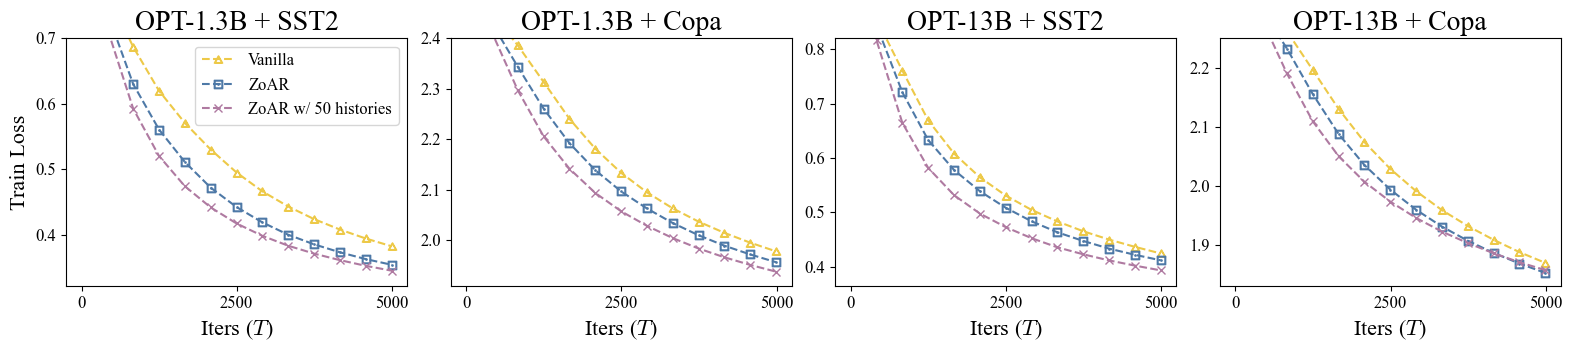

In [27]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["figure.figsize"] = (3.5, 3)

n = 12
# num_histories = 15
seeds = [456, 457, 458]
eps_str = "1e-2"
num_iterations = 5000

modes = "train"
update_rule = "radazo"
tasks = ["SST2", "Copa"]
models = ["opt-1.3b", "opt-13b"]
tasks_and_models = [(m, t) for m in models for t in tasks]
y_lims = [0.7, 2.4, 0.82, 2.25]
optimizers = [ # optimizer_name, label, num_histories
    ("vanilla", 15),
    ("zoar_pm_purtb", 15),
    ("zoar_pm_purtb", 50),
]
# optimizers = ["vanilla", "zoar_pm_purtb", "zoar_pm_purtb 50"]
labels = ["Vanilla", "ZoAR", "ZoAR w/ 50 histories"]
markers = [r'$\triangle$', r'$\boxdot$', 'x', r'$\circ$', r'$\heartsuit$', 'x']
# colors = ['#4682B4', '#3CB371', 'y', '#D2691E', '#FF6347']
colors = [
    '#EDC948',  # Yellow/Gold
    '#4E79A7',  # Steel Blue
    '#AF7AA1',  # Muted Purple/Pink
    '#59A14F',  # Green
    '#E15759'   # Strong Coral Red (Emphasis)
]

plt.figure(figsize=(4 * len(tasks_and_models), 4))
for t, (model, task) in enumerate(tasks_and_models):
    plt.subplot(1, len(tasks_and_models), 1 + t)
    for i, (optimizer_name, num_histories) in enumerate(optimizers):
        histories = []
        for seed in seeds:
            history = torch.load(f"./results/mezo/{model}/mezo-{model}-{optimizer_name}-{task}-lora-{num_iterations}-16-5e-5-{eps_str}-{update_rule}-{num_histories}-s{seed}-{modes}_loss.pt")

            if modes == "train":
                # history = curve_smooth_ema(history, alpha=0.99)
                # history = curve_smooth_time_weighted_ema(history, smoothing_param=0.9)
                history = curve_smooth_simple(history)

                # history = history[:3000]

            histories.append(history)
        
        start = 0
        end = len(histories[0])
        if modes == "train":
            interval = (end - start) // n
            xs = torch.arange(start, end, interval)
            ys = torch.tensor(histories).mean(dim=0)[start:end:interval]
        else:
            xs = torch.arange(start, end)
            ys = torch.tensor(histories).mean(dim=0)

        # if optimizer == "vanilla":
        #     x_end = xs[-1]
        #     y_start, y_end = ys[-1], ys[-1]
        # # elif optimizer == "zoar_pm_purtb":
        # elif optimizer == "zoar":
        #     dist = torch.abs(ys - y_end)
        #     ind = torch.argmin(dist)
        #     x_start = xs[ind]
        #     speedup = x_end / x_start

        plt.plot(xs, ys, marker=markers[i], color=colors[i], label=labels[i], linestyle='--', markersize=6.0)

    plt.xlabel('Iters ($T$)', fontsize=16)
    plt.xticks([0, 2500, 5000], fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(None, y_lims[t])
    if t == 0:
        plt.ylabel(f"{modes.capitalize()} Loss", fontsize=16)
        plt.legend(fontsize=12) #, bbox_to_anchor=(1.0, 0.4))
    plt.title(f"{model.upper()} + {task}", fontsize=20)

    # plt.annotate(
    #     '', # No text
    #     xy=(x_end, y_end),  # End point of the arrow
    #     xytext=(x_start, y_start), # Start point of the arrow
    #     arrowprops=dict(
    #         arrowstyle="<->", # Double-headed arrow style
    #         color="black",  # Arrow color
    #         lw=1.3, # Line width of the arrow
    #         shrinkA=0, # how much the arrow is shrunk on the start end
    #         shrinkB=0, # how much the arrow is shrunk on the end end
    #     ),
    # )
    # plt.annotate(
    #     r'%.2f$\times$' % speedup, # No text
    #     xy=( (x_start + x_end)/2, (y_start + y_end)/2), # Arrow midpoint
    #     xytext=( (x_start + x_end)/2/x_shift[0], (y_start + y_end)/2/y_shift[0]), # Shift text downwards
    #     horizontalalignment='center', # Center the text horizontally
    #     verticalalignment='top'  # Align the text below the arrow
    # )
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=0.0)
plt.savefig(f"./figures/mezo-{update_rule}-{modes}.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


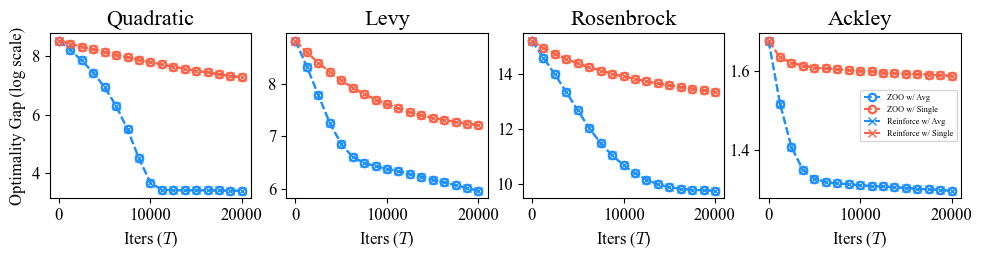

In [2]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["figure.figsize"] = (3.5, 3)

n = 16
num_runs = 5

update_rule = "radazo"
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanillaBaseline", "zoarBaseline"]
baselines = ["average", "func_values"]
baselines_labels = ["Avg", "Single"]
labels = ["ZOO", "Reinforce"]
# markers = [r'$\heartsuit$', r'$\boxdot$', r'p', r'$\circ$', r'$\triangle$', 'x']
markers = [r'$\circ$', r'x']
colors = ['#1E90FF', '#FF6347']

plt.figure(figsize=(10, 3))
for i, func in enumerate(funcs):
    plt.subplot(1, len(funcs), 1 + i)
    for j, optimizer in enumerate(optimizers):
        for k, baseline in enumerate(baselines):
            histories = []
            for run in range(num_runs):
                history = torch.load(f"./results/synthetic-baseline/{func}_{optimizer}_{update_rule}_{baseline}_d10000_ni20000_lr0.001_nq10_mu0.05_s{456 + run}.pt")
                histories.append(history)
            
            start = 0
            end = len(histories[0])
            interval = (end - start) // n
            xs = torch.arange(start, end, interval)
            ys = torch.log(torch.tensor(histories).mean(dim=0))[start:end:interval]
            plt.plot(xs, ys, marker=markers[j], color=colors[k], label=labels[j] + f" w/ {baselines_labels[k]}", linestyle='--', markersize=6.0)


    plt.xlabel('Iters ($T$)', fontsize=12)
    # plt.xticks([0, 5000, 10000], fontsize=10)
    plt.title(func.capitalize(), fontsize=16)
    if i == 0:
        plt.ylabel("Optimality Gap (log scale)", fontsize=12)
    if i == len(funcs) - 1:
        plt.legend(fontsize=6)
    
    # plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=-0.5)
plt.savefig(f"./figures/synthetic-baseline.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [ ]:
import yaml
from easydict import EasyDict
from script.run_synthetic import run_synthetic

path_to_config = 'config/synthetic.yaml'
# path_to_config = 'config/synthetic-sgd.yaml'
with open(path_to_config, 'r') as f:
    args = yaml.safe_load(f)
args = EasyDict(args)

funcs = ["ackley", "levy", "rosenbrock", "quadratic"]
# update_rules = ["adam", "radazo"]
update_rules = ["adam"]
num_runs = 5
seed = args.seed
for update_rule in reversed(update_rules):
    for func_name in funcs:
        for num_run in range(num_runs):
            args.func_name = func_name
            args.update_rule = update_rule
            args.seed = seed + num_run
            run_synthetic(args)

In [ ]:
import yaml
from easydict import EasyDict
from script.run_adversarial import run_adversarial

path_to_config = 'config/adversarial.yaml'
with open(path_to_config, 'r') as f:
    args = yaml.safe_load(f)
args = EasyDict(args)

update_rules = ["adam", "radazo"]
num_runs = 5
seed = args.seed
for update_rule in reversed(update_rules):
    for num_run in range(num_runs):
        args.update_rule = update_rule
        args.seed = seed + num_run
        run_adversarial(args)

In [ ]:
import yaml
from easydict import EasyDict
from script.run_synthetic import run_synthetic

path_to_config = 'config/synthetic-baseline.yaml'
with open(path_to_config, 'r') as f:
    args = yaml.safe_load(f)
args = EasyDict(args)

funcs = ["ackley", "levy", "rosenbrock", "quadratic"]
baselines = ["average", "func_values"]
update_rule = "radazo"
num_runs = 5
seed = args.seed
for baseline in baselines:
    for func_name in funcs:
        for num_run in range(num_runs):
            args.func_name = func_name
            args.update_rule = update_rule
            args.baseline = baseline
            args.seed = seed + num_run
            run_synthetic(args)

## Same parameters

In [ ]:
import yaml
from easydict import EasyDict
from script.run_synthetic import run_synthetic

path_to_config = 'config/synthetic.yaml'
# path_to_config = 'config/synthetic-sgd.yaml'
with open(path_to_config, 'r') as f:
    args = yaml.safe_load(f)
args = EasyDict(args)

funcs = ["ackley", "levy", "rosenbrock", "quadratic"]
update_rules = ["adam"]
seed = args.seed
lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]
# mus = [0.1, 0.05, 0.01]
for update_rule in reversed(update_rules):
    for func_name in funcs:
        for lr in lrs:
            # for mu in mus:
            args.lr = lr
            # args.mu = mu
            args.func_name = func_name
            args.update_rule = update_rule
            args.seed = seed
            run_synthetic(args)

/tmp/ipykernel_112889/325859041.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(f"./results/synthetic/{func}_{optimizer}_{update_rule}_d10000_ni200

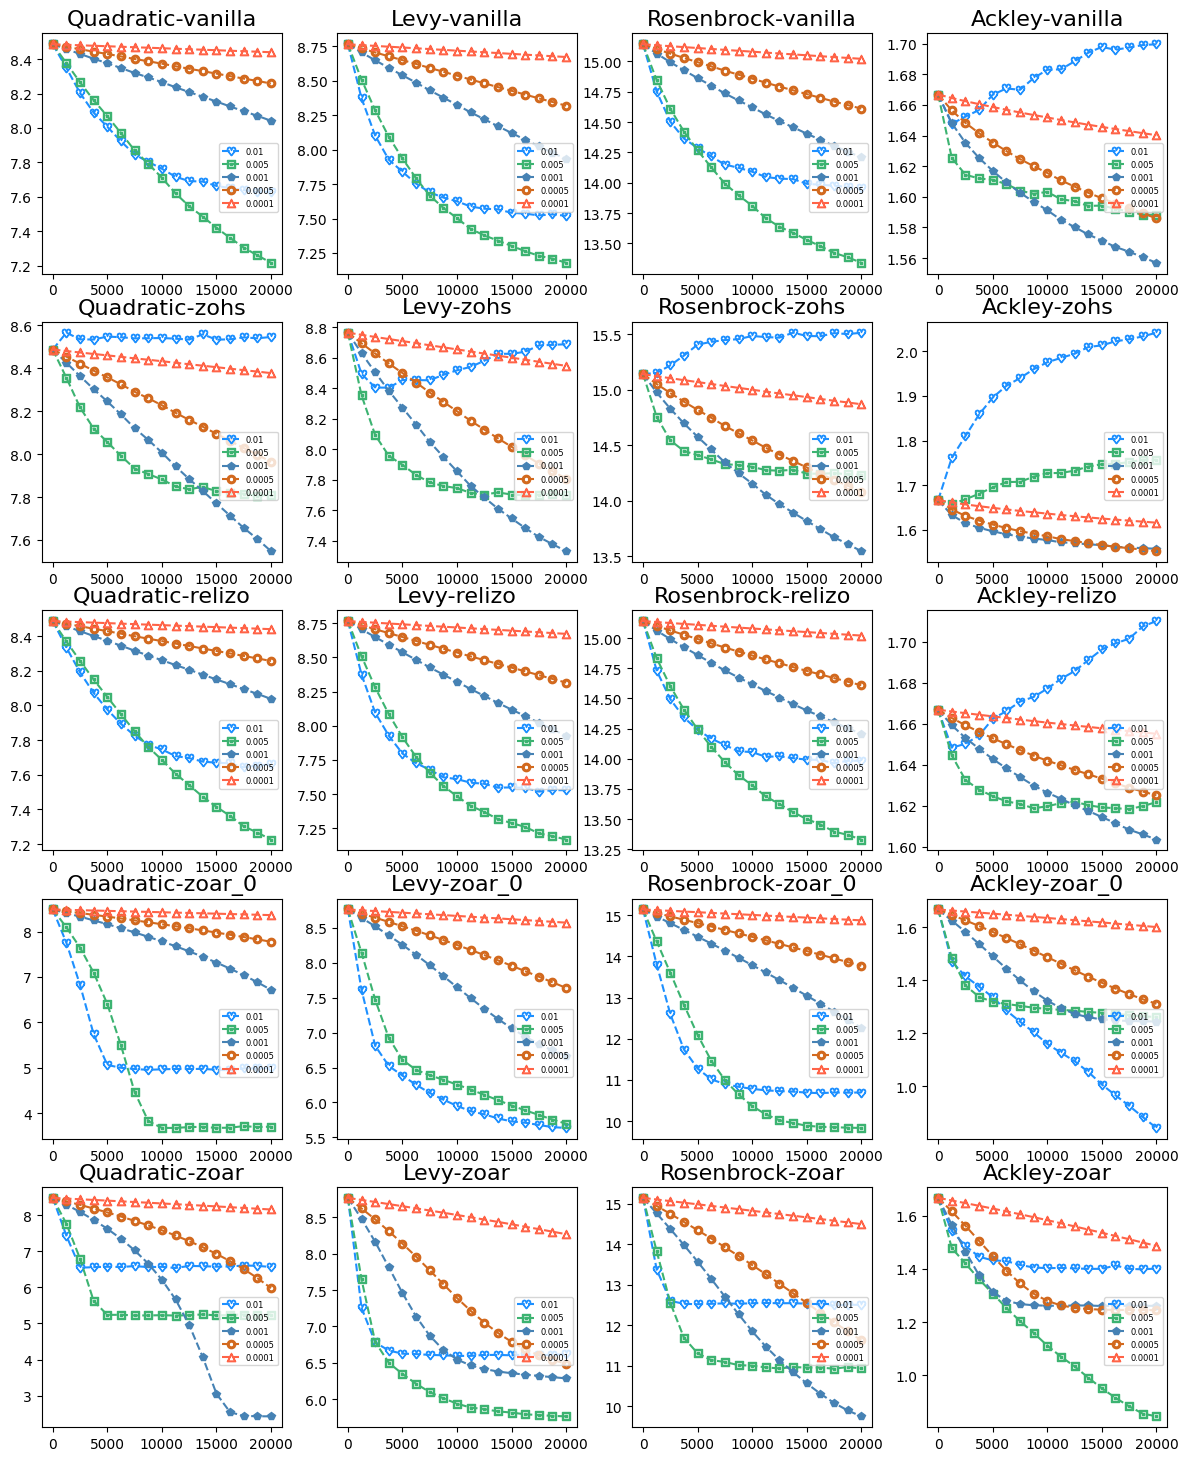

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch

n = 16
num_runs = 5
lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]

update_rule = "adam"
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR"]
markers = [r'$\heartsuit$', r'$\boxdot$', r'p', r'$\circ$', r'$\triangle$', 'x']
colors = ['#1E90FF', '#3CB371', '#4682B4', '#D2691E', '#FF6347']

plt.figure(figsize=(12, 16))
for j, func in enumerate(funcs):
    for i, optimizer in enumerate(optimizers):
        plt.subplot(len(optimizers), len(funcs), 1 + i * len(funcs) + j)
        for k, lr in enumerate(lrs):
            history = torch.load(f"./results/synthetic_search_optlr/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr{lr}_nq10_mu0.05_nh5_s{456}.pt")
            history = torch.tensor(history)
            
            start = 0
            end = len(history)
            interval = (end - start) // n

            xs = torch.arange(start, end, interval)
            ys = torch.log(history)[start:end:interval]
            plt.plot(xs, ys, marker=markers[k], color=colors[k], label=f"{lr}", linestyle='--', markersize=6.0)

        plt.title(func.capitalize()+"-"+optimizer, fontsize=16)
        plt.legend(fontsize=6, loc='right', bbox_to_anchor=(1.0, 0.4))
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=-0.5)
# plt.savefig(f"./figures/synthetic-{update_rule}.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

/tmp/ipykernel_974466/701590111.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(f"./results/synthetic_search_optlr/{func}_{optimizer}_{update_rule}

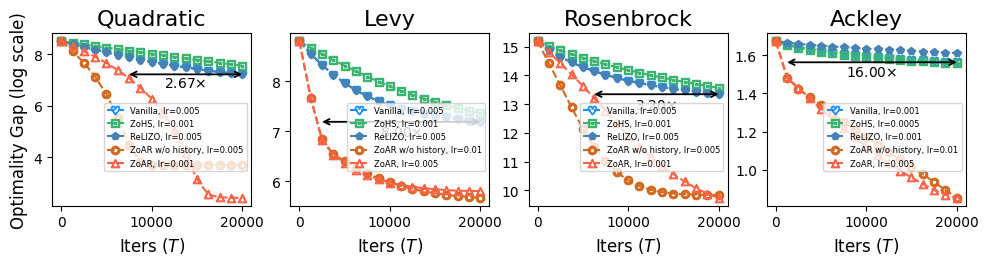

In [7]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch

n = 16
num_runs = 5
lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]

opt_lr = []
update_rule = "adam"
x_shift = [1.0, 1.0, 1.0, 1.0]
y_shift = [1.01, 1.01, 1.01, 1.01]
# update_rule = "adam"
# x_shift = [1.0, 1.7, 1.5, 1.0]
# y_shift = [1.1, 1.01, 1.02, 1.01]
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR"]
markers = [r'$\heartsuit$', r'$\boxdot$', r'p', r'$\circ$', r'$\triangle$', 'x']
colors = ['#1E90FF', '#3CB371', '#4682B4', '#D2691E', '#FF6347']

plt.figure(figsize=(10, 3))
for i, func in enumerate(funcs):
    plt.subplot(1, len(funcs), 1 + i)
    for j, optimizer in enumerate(optimizers):
        opt_value = 10000
        opt_ys = None
        opt_lr = None
        for k, lr in enumerate(lrs):
            histories = []
            for run in range(num_runs):
                history = torch.load(f"./results/synthetic_search_optlr/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr{lr}_nq10_mu0.05_nh5_s{456 + run}.pt")
                histories.append(history)
            
            history = torch.tensor(histories).mean(dim=0)
            ys = torch.log(history)

            if ys[-1] < opt_value:
                opt_value = ys[-1]
                opt_ys = ys
                opt_lr = lr
        
        start = 0
        end = len(histories[0])
        interval = (end - start) // n
        xs = torch.arange(start, end, interval)
        ys = opt_ys[start:end:interval]
        plt.plot(xs, ys, marker=markers[j], color=colors[j], label=f"{labels[j]}, lr={opt_lr}", linestyle='--', markersize=6.0)

        if optimizer == "vanilla":
            x_end = xs[-1]
            y_start, y_end = ys[-1], ys[-1]
        elif optimizer == "zoar":
            dist = torch.abs(ys - y_end)
            ind = torch.argmin(dist)
            x_start = xs[ind]
            speedup = x_end / x_start


    plt.xlabel('Iters ($T$)', fontsize=12)
    # plt.xticks([0, 5000, 10000], fontsize=10)
    plt.title(func.capitalize(), fontsize=16)
    if i == 0:
        plt.ylabel("Optimality Gap (log scale)", fontsize=12)

    plt.legend(fontsize=6, loc='right', bbox_to_anchor=(1.0, 0.4))

    plt.annotate(
        '', # No text
        xy=(x_end, y_end),  # End point of the arrow
        xytext=(x_start, y_start), # Start point of the arrow
        arrowprops=dict(
            arrowstyle="<->", # Double-headed arrow style
            color="black",  # Arrow color
            lw=1.3, # Line width of the arrow
            shrinkA=0, # how much the arrow is shrunk on the start end
            shrinkB=0, # how much the arrow is shrunk on the end end
        ),
    )
    plt.annotate(
        r'%.2f$\times$' % speedup, # No text
        xy=( (x_start + x_end)/2, (y_start + y_end)/2), # Arrow midpoint
        xytext=( (x_start + x_end)/2/x_shift[i], (y_start + y_end)/2/y_shift[i]), # Shift text downwards
        horizontalalignment='center', # Center the text horizontally
        verticalalignment='top'  # Align the text below the arrow
    )
    
    # plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=-0.5)
# plt.savefig(f"./figures/synthetic-{update_rule}.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [ ]:
import torch
import pandas as pd

num_runs = 1
lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]

update_rule = "adam"
seeds = [456, 457, 458, 459, 460]
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR"]

performance = pd.DataFrame(columns=funcs, index=labels)
opt_steps = pd.DataFrame(columns=funcs, index=labels)
for j, func in enumerate(funcs):
    for i, optimizer in enumerate(optimizers):
        opt_value = []
        opt_step = []
        for k, lr in enumerate(lrs):
            histories = []
            for seed in seeds:
                history = torch.load(f"./results/synthetic_search_optlr/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr{lr}_nq10_mu0.05_nh5_s{seed}.pt")
                histories.append(history)
            history = torch.tensor(histories).mean(dim=0)

            ys = torch.log(history)

            # opt_value.append(ys.min().item())
            opt_value.append(ys[-1].item())

            # found the first iteration that the optimality gap is less than 1% error
            indx = torch.where(torch.abs(ys - opt_value[-1]) < 0.01 * opt_value[-1])
            if len(indx[0]) > 0:
                opt_step.append(indx[0][0].item())
            else:
                opt_step.append(len(ys) - 1)

        # print(f"{func} - {optimizer}: {opt_value}")

        performance.loc[labels[i], func] = torch.tensor(opt_value).min().item()
        opt_steps.loc[labels[i], func] = opt_step[torch.tensor(opt_value).argmin().item()]

performance.style.highlight_min(axis=0, props='font-weight: bold; font-style: italic;')
# performance.to_csv("./results/synthetic_search_optlr.csv")
opt_steps.style.highlight_min(axis=0, props='font-weight: bold; font-style: italic;')
# opt_steps.to_csv("./results/synthetic_search_optlr_steps.csv")

/tmp/ipykernel_974466/2724281299.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(f"./results/synthetic_search_optlr/{func}_{optimizer}_{update_rule

## large k

/tmp/ipykernel_338189/3693829197.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(f"./results/synthetic_largek/{func}_{optimizer}_{update_rule}_d100

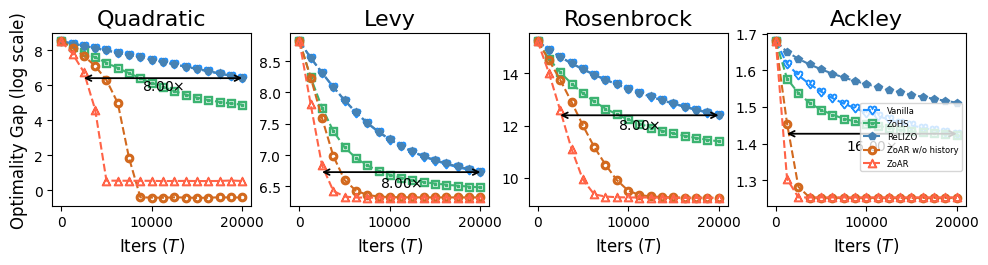

In [16]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch

n = 16
num_runs = 5

update_rule = "adam"
x_shift = [1.0, 1.0, 1.0, 1.0]
y_shift = [1.01, 1.01, 1.01, 1.01]
# update_rule = "adam"
# x_shift = [1.0, 1.7, 1.5, 1.0]
# y_shift = [1.1, 1.01, 1.02, 1.01]
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR"]
markers = [r'$\heartsuit$', r'$\boxdot$', r'p', r'$\circ$', r'$\triangle$', 'x']
colors = ['#1E90FF', '#3CB371', '#4682B4', '#D2691E', '#FF6347']

plt.figure(figsize=(10, 3))
for i, func in enumerate(funcs):
    plt.subplot(1, len(funcs), 1 + i)
    for j, optimizer in enumerate(optimizers):
        histories = []
        history = torch.load(f"./results/synthetic_largek/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr0.001_nq200_mu0.05_nh5_s{456}.pt")
        histories.append(history)
        
        start = 0
        end = len(histories[0])
        interval = (end - start) // n
        xs = torch.arange(start, end, interval)
        ys = torch.log(torch.tensor(histories).mean(dim=0))[start:end:interval]
        plt.plot(xs, ys, marker=markers[j], color=colors[j], label=labels[j], linestyle='--', markersize=6.0)

        if optimizer == "vanilla":
            x_end = xs[-1]
            y_start, y_end = ys[-1], ys[-1]
        elif optimizer == "zoar":
            dist = torch.abs(ys - y_end)
            ind = torch.argmin(dist)
            x_start = xs[ind]
            speedup = x_end / x_start


    plt.xlabel('Iters ($T$)', fontsize=12)
    # plt.xticks([0, 5000, 10000], fontsize=10)
    plt.title(func.capitalize(), fontsize=16)
    if i == 0:
        plt.ylabel("Optimality Gap (log scale)", fontsize=12)
    if i == len(funcs) - 1:
        plt.legend(fontsize=6, loc='right', bbox_to_anchor=(1.0, 0.4))

    plt.annotate(
        '', # No text
        xy=(x_end, y_end),  # End point of the arrow
        xytext=(x_start, y_start), # Start point of the arrow
        arrowprops=dict(
            arrowstyle="<->", # Double-headed arrow style
            color="black",  # Arrow color
            lw=1.3, # Line width of the arrow
            shrinkA=0, # how much the arrow is shrunk on the start end
            shrinkB=0, # how much the arrow is shrunk on the end end
        ),
    )
    plt.annotate(
        r'%.2f$\times$' % speedup, # No text
        xy=( (x_start + x_end)/2, (y_start + y_end)/2), # Arrow midpoint
        xytext=( (x_start + x_end)/2/x_shift[i], (y_start + y_end)/2/y_shift[i]), # Shift text downwards
        horizontalalignment='center', # Center the text horizontally
        verticalalignment='top'  # Align the text below the arrow
    )
    
    # plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=-0.5)
# plt.savefig(f"./figures/synthetic-{update_rule}.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [ ]:
import torch
import pandas as pd

num_runs = 1
update_rule = "adam"
seeds = [456]
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR"]

performance = pd.DataFrame(columns=funcs, index=labels)
opt_steps = pd.DataFrame(columns=funcs, index=labels)
for j, func in enumerate(funcs):
    for i, optimizer in enumerate(optimizers):
        histories = []
        for seed in seeds:
            history = torch.load(f"./results/synthetic_largek/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr0.001_nq200_mu0.05_nh5_s{seed}.pt")
            histories.append(history)
        history = torch.tensor(histories).mean(dim=0)

        ys = torch.log(history)

        opt_value = ys.min().item()
        # opt_value = ys[-1].item()

        performance.loc[labels[i], func] = opt_value

        indx = torch.where(torch.abs(ys - opt_value) < 0.01 * opt_value)
        if len(indx[0]) > 0:
            opt_step = indx[0][0].item()
        else:
            opt_step = len(ys) - 1

        opt_steps.loc[labels[i], func] = opt_step

performance.style.highlight_min(axis=0, props='font-weight: bold; font-style: italic;')
# performance.to_csv("./results/synthetic_largek.csv")
opt_steps.style.highlight_min(axis=0, props='font-weight: bold; font-style: italic;')
# opt_steps.to_csv("./results/synthetic_largek_steps.csv")

/tmp/ipykernel_974466/3135518474.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(f"./results/synthetic_largek/{func}_{optimizer}_{update_rule}_d100

## Centered Difference

In [ ]:
import yaml
from easydict import EasyDict
from script.run_synthetic import run_synthetic

path_to_config = 'config/synthetic.yaml'
with open(path_to_config, 'r') as f:
    args = yaml.safe_load(f)
args = EasyDict(args)

funcs = ["ackley", "levy", "rosenbrock", "quadratic"]
# update_rules = ["adam", "radazo"]
update_rules = ["adam"]
num_runs = 5
seed = args.seed
for update_rule in reversed(update_rules):
    for func_name in funcs:
        for num_run in range(num_runs):
            args.func_name = func_name
            args.update_rule = update_rule
            args.seed = seed + num_run
            run_synthetic(args)

/tmp/ipykernel_338189/257332095.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(f"./results/synthetic_centered_difference/{func}_{optimizer}_{updat

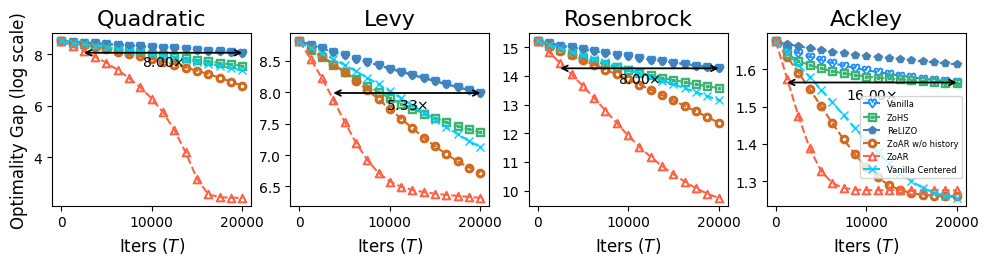

In [28]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
import torch

n = 16
num_runs = 5

update_rule = "adam"
x_shift = [1.0, 1.0, 1.0, 1.0]
y_shift = [1.01, 1.01, 1.01, 1.01]
# update_rule = "adam"
# x_shift = [1.0, 1.7, 1.5, 1.0]
# y_shift = [1.1, 1.01, 1.02, 1.01]
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar", "vanilla_centered"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR", "Vanilla Centered"]
markers = [r'$\heartsuit$', r'$\boxdot$', r'p', r'$\circ$', r'$\triangle$', 'x']
colors = ['#1E90FF', '#3CB371', '#4682B4', '#D2691E', '#FF6347', "#00D0FF"]

plt.figure(figsize=(10, 3))
for i, func in enumerate(funcs):
    plt.subplot(1, len(funcs), 1 + i)
    for j, optimizer in enumerate(optimizers):
        histories = []
        for run in range(num_runs):
            history = torch.load(f"./results/synthetic_centered_difference/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr0.001_nq10_mu0.05_nh5_s{456 + run}.pt")
            histories.append(history)
        
        start = 0
        end = len(histories[0])
        interval = (end - start) // n
        xs = torch.arange(start, end, interval)
        ys = torch.log(torch.tensor(histories).mean(dim=0))[start:end:interval]
        plt.plot(xs, ys, marker=markers[j], color=colors[j], label=labels[j], linestyle='--', markersize=6.0)

        if optimizer == "vanilla":
            x_end = xs[-1]
            y_start, y_end = ys[-1], ys[-1]
        elif optimizer == "zoar":
            dist = torch.abs(ys - y_end)
            ind = torch.argmin(dist)
            x_start = xs[ind]
            speedup = x_end / x_start


    plt.xlabel('Iters ($T$)', fontsize=12)
    # plt.xticks([0, 5000, 10000], fontsize=10)
    plt.title(func.capitalize(), fontsize=16)
    if i == 0:
        plt.ylabel("Optimality Gap (log scale)", fontsize=12)
    if i == len(funcs) - 1:
        plt.legend(fontsize=6, loc='right', bbox_to_anchor=(1.0, 0.4))

    plt.annotate(
        '', # No text
        xy=(x_end, y_end),  # End point of the arrow
        xytext=(x_start, y_start), # Start point of the arrow
        arrowprops=dict(
            arrowstyle="<->", # Double-headed arrow style
            color="black",  # Arrow color
            lw=1.3, # Line width of the arrow
            shrinkA=0, # how much the arrow is shrunk on the start end
            shrinkB=0, # how much the arrow is shrunk on the end end
        ),
    )
    plt.annotate(
        r'%.2f$\times$' % speedup, # No text
        xy=( (x_start + x_end)/2, (y_start + y_end)/2), # Arrow midpoint
        xytext=( (x_start + x_end)/2/x_shift[i], (y_start + y_end)/2/y_shift[i]), # Shift text downwards
        horizontalalignment='center', # Center the text horizontally
        verticalalignment='top'  # Align the text below the arrow
    )
    
    # plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        
plt.tight_layout(rect=[0, 0.07, 1, 0.99], h_pad=0, w_pad=-0.5)
# plt.savefig(f"./figures/synthetic-{update_rule}.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [12]:
import torch
import pandas as pd

num_runs = 1
update_rule = "adam"
seeds = [456, 457, 458, 459, 460]
funcs = ["quadratic", "levy", "rosenbrock", "ackley"]
optimizers = ["vanilla", "zohs", "relizo", "zoar_0", "zoar", "vanilla_centered"]
labels = ["Vanilla", "ZoHS", "ReLIZO", "ZoAR w/o history", "ZoAR", "Vanilla Centered"]

performance = pd.DataFrame(columns=funcs, index=labels)
opt_steps = pd.DataFrame(columns=funcs, index=labels)
for j, func in enumerate(funcs):
    for i, optimizer in enumerate(optimizers):
        histories = []
        for seed in seeds:
            history = torch.load(f"./results/synthetic_centered_difference/{func}_{optimizer}_{update_rule}_d10000_ni20000_lr0.001_nq10_mu0.05_nh5_s{seed}.pt")
            histories.append(history)
        history = torch.tensor(histories).mean(dim=0)

        ys = torch.log(history)

        opt_value = ys.min().item()
        # opt_value = ys[-1].item()

        performance.loc[labels[i], func] = opt_value

        indx = torch.where(torch.abs(ys - opt_value) < 0.01 * opt_value)
        if len(indx[0]) > 0:
            opt_step = indx[0][0].item()
        else:
            opt_step = len(ys) - 1

        opt_steps.loc[labels[i], func] = opt_step

performance.style.highlight_min(axis=0, props='font-weight: bold; font-style: italic;')
# performance.to_csv("./results/synthetic_centered_difference.csv")
opt_steps.style.highlight_min(axis=0, props='font-weight: bold; font-style: italic;')
opt_steps.to_csv("./results/synthetic_centered_difference_steps.csv")

/tmp/ipykernel_974466/3192089887.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(f"./results/synthetic_centered_difference/{func}_{optimizer}_{upda